In [1]:
import os
import fnmatch
from os.path import isfile, join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# Plot Chirality
    
    In this script, I will draw the evolution of the chirality by increasing the magnetic field strenght

In [2]:
data_directory = "/media/Carol/Magnetic/Simulations/Cairo_lattice_PROJECT/Output_simulations/Output_Script-8.1"

In [3]:
def read_chirality_data(directory = str, filename = str ):
    
    Chi= []
    for file in os.listdir(data_directory):
        if fnmatch.fnmatch(file, filename):
            print(file)

            df = pd.read_csv(os.path.join(data_directory,file), sep = '\t',index_col = [0,1])

            Chi.append(df)


    keys_Chi = []
    for i in range(len(Chi)):
        keys_Chi.append(i)

    Chi_exp = pd.concat(Chi, keys = keys_Chi)
    Chi_exp.index.names = ['Exp', 'frame','pentagon']
    
    return Chi_exp

In [4]:
def tot_Chi(Chi_exp):
    
    Chi_exp['abs_C']= abs(Chi_exp.Chi)
    
    # <Removing pentagons from the boundaries>
    x_min = Chi_exp.x_c.min()
    x_max = Chi_exp.x_c.max()

    y_min = Chi_exp.y_c.min()
    y_max = Chi_exp.y_c.max()

    Chi_exp = Chi_exp[Chi_exp.x_c != x_min]
    Chi_exp = Chi_exp[Chi_exp.x_c != x_max]
    Chi_exp = Chi_exp[Chi_exp.y_c != y_max]
    Chi_exp = Chi_exp[Chi_exp.y_c != y_min]
    
    a = Chi_exp.groupby(level= 1).mean().filter(items=['abs_C'])
    a['err'] = Chi_exp.groupby(level= 1).std().filter(items=['abs_C'])/10
    
    return a 
    

In [5]:
def sep_Chi(Chi_exp):
    
    Sep_Chi = Chi_exp.groupby(['Exp','frame','Chi']).count().filter('x').rename(columns = {'x':'count'})
    Sep_Chi_count = Sep_Chi.groupby(['frame','Chi']).mean()/3800
    Sep_Chi_std = Sep_Chi.groupby(['frame','Chi']).std()/(3800*np.sqrt(10))
    Sep_Chi_count['err'] = Sep_Chi_std['count']
    
    return Sep_Chi_count

In [22]:
def plot_tot_Chi(a):
    
    fig, ax1 = plt.subplots(figsize=(7,7))

    ax2 = ax1.twinx()


    ax1.errorbar(a.index.get_level_values('frame')/100, a.abs_C, yerr = a.err,fmt = 'o', color = 'red')
    ax1.plot(a.index.get_level_values('frame')/100, a.abs_C, 'o', color = 'red')

    ax1.tick_params(axis='y', labelsize=30)
    ax1.tick_params(axis='x', labelsize=30) 
    ax1.set_yticks([0.3,0.4,0.5,0.6,0.7])

    ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
    ax1.set_xlabel('time (s)', size = 40)
    ax1.set_ylabel('Total Chirality', size = 40)

    ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


    ax2.set_ylabel('B (mT)', size = 40)
    ax2.tick_params(axis='y', labelsize=30)



    plt.savefig('Chirality.png',  bbox_inches='tight')
    plt.show()

In [19]:
def plot_sep_Chi(Sep_Chi_count):

    mpl.rcParams["font.family"] = "Arial"
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                        "orange", "royalblue", "limegreen", 
                                                        "blueviolet","darkorange", "tomato",
                                                        "red"]) 

    fig, ax1 = plt.subplots(figsize=(7,7))

    cm = plt.cm.get_cmap('seismic')

    C = ax1.scatter(Sep_Chi_count.index.get_level_values('frame')/100, Sep_Chi_count['count'], c = Sep_Chi_count.index.get_level_values('Chi'), cmap=cm, )
    #plt.errorbar(Sep_Chi_count.index.get_level_values('frame')/100, Sep_Chi_count['count'], yerr = Sep_Chi_count['err'], fmt = '.', markersize = 0, capsize=3, color='gray')
    #plt.plot(Sep_Chi.index.get_level_values('frame'), Sep_Chi['count'], 'o')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)


    cbar = plt.colorbar(C, cax =cax)
    cbar.set_label( 'Chirality, $\chi$',rotation=270, size = 30, labelpad=40)
    cbar.ax.tick_params(labelsize=20) 
    ax1.set_xlabel('time (s)', size = 40)
    ax1.set_ylabel('$N_{\chi}/N_{p}$', size = 40)
    ax1.tick_params(axis='y', labelsize=30)
    ax1.tick_params(axis='x', labelsize=30) 

In [8]:
Chi_exp_2500 = read_chirality_data(data_directory, "ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp*.dat")

ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp41.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp24.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp1.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp26.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp22.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp23.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp4.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp39.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp17.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp33.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp44.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp19.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp30.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp16.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_chirality_l10_exp3.dat
ACI_CairoLatt

In [9]:
Chi_exp_4500 = read_chirality_data(data_directory, "ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp*.dat")

ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp4.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp1.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp5.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp3.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp2.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp0.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp9.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp6.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp8.dat
ACI_CairoLattice_25mT-4500s_PeriodicBound_chirality_l10_exp7.dat


In [10]:
a_2500 = tot_Chi(Chi_exp_2500)
b_2500 = sep_Chi(Chi_exp_2500)

a_4500 = tot_Chi(Chi_exp_4500)
b_4500 = sep_Chi(Chi_exp_4500)

In [12]:
def field(row):
    if row['time(s)'] < 2000:
        value = row['time(s)']*25/2000 # mT/sec rate
    else:
        value = 25
    return value

a_2500['time(s)'] = a_2500.index.get_level_values('frame')/100
b_2500['time(s)'] = b_2500.index.get_level_values('frame')/100

a_2500['field(mT)'] = a_2500.apply (lambda row: field(row) , axis=1)
b_2500['field(mT)'] = b_2500.apply (lambda row: field(row) , axis=1)

In [14]:
a_2500.to_csv('Tot_chirality_theta30.dat',sep = '\t')
b_2500.to_csv('Sep_chirality_theta30.dat',sep = '\t')

In [15]:
b_2500.tail()

count       err  time(s)  field(mT)
frame  Chi                                         
250000 -0.6  0.136895  0.003448   2500.0       25.0
       -0.2  0.168658  0.004014   2500.0       25.0
        0.2  0.168053  0.003440   2500.0       25.0
        0.6  0.136684  0.003265   2500.0       25.0
        1.0  0.221763  0.001975   2500.0       25.0

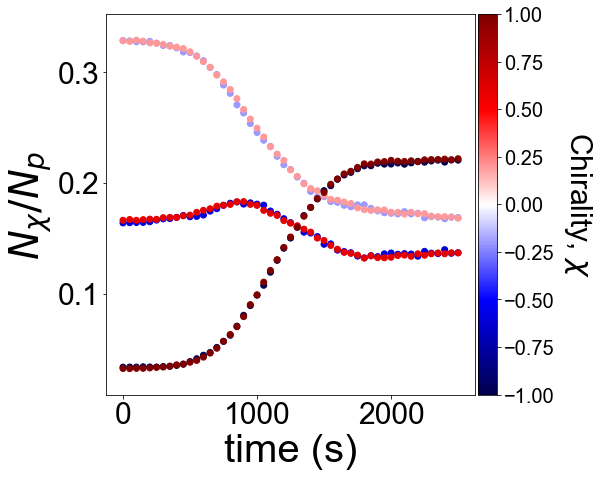

In [20]:
plot_sep_Chi(b_2500)

No handles with labels found to put in legend.


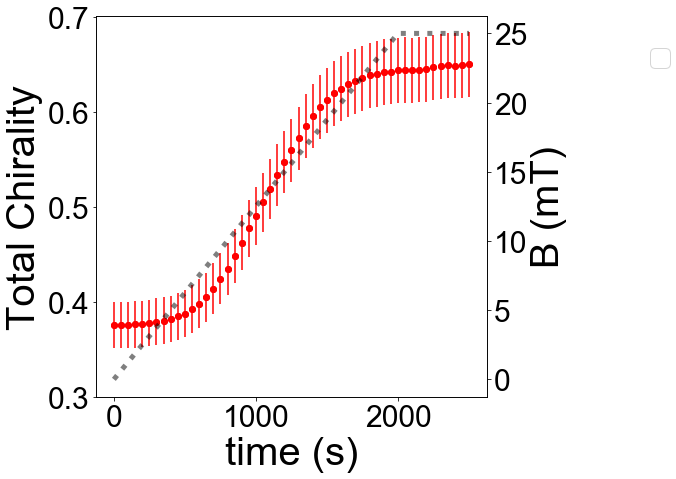

In [23]:
plot_tot_Chi(a_2500)

No handles with labels found to put in legend.


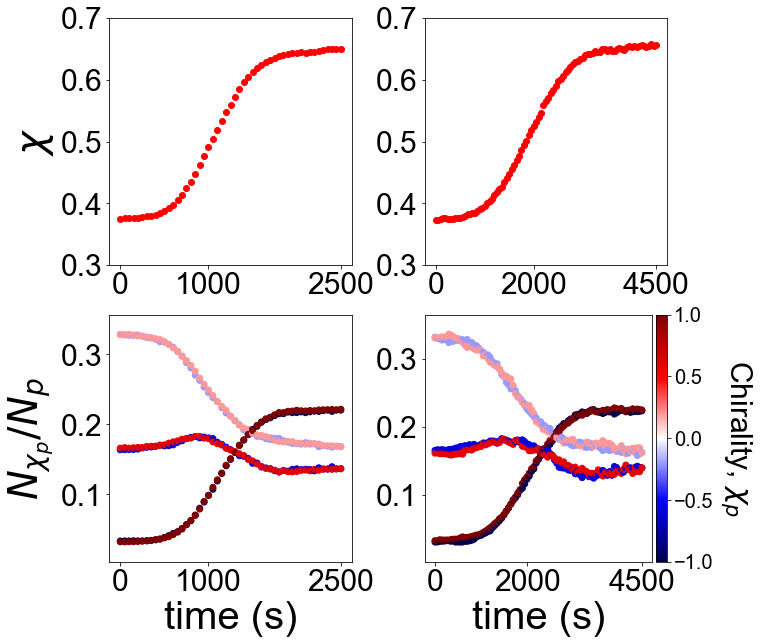

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

fig.subplots_adjust(wspace=0.3)
#ax1.errorbar(a.index.get_level_values('frame')/100, a.abs_C, yerr = a.err,fmt = 'o', color = 'red')
ax[0][0].plot(a_2500.index.get_level_values('frame')/100, a_2500.abs_C, 'o', color = 'red')
ax[0][1].plot(a_4500.index.get_level_values('frame')/100, a_4500.abs_C, 'o', color = 'red')


ax[0][0].tick_params(axis='y', labelsize=30)
ax[0][0].tick_params(axis='x', labelsize=30) 
ax[0][0].set_yticks([0.3,0.4,0.5,0.6,0.7])
ax[0][0].set_xticks([0,1000,2500])


ax[0][1].tick_params(axis='y', labelsize=30)
ax[0][1].tick_params(axis='x', labelsize=30) 
ax[0][1].set_yticks([0.3,0.4,0.5,0.6,0.7])
ax[0][1].set_xticks([0,2000,4500])



ax[0][0].legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
#ax[0].set_xlabel('time (s)', size = 40)
ax[0][0].set_ylabel('$\chi$', size = 40)
ax[0][0].tick_params(axis='y', labelsize=30)

cm = plt.cm.get_cmap('seismic')

C = ax[1][0].scatter(b_2500.index.get_level_values('frame')/100, b_2500['count'], c = b_2500.index.get_level_values('Chi'), cmap=cm, )
C = ax[1][1].scatter(b_4500.index.get_level_values('frame')/100, b_4500['count'], c = b_4500.index.get_level_values('Chi'), cmap=cm, )

#plt.errorbar(Sep_Chi_count.index.get_level_values('frame')/100, Sep_Chi_count['count'], yerr = Sep_Chi_count['err'], fmt = '.', markersize = 0, capsize=3, color='gray')
#plt.plot(Sep_Chi.index.get_level_values('frame'), Sep_Chi['count'], 'o')
divider = make_axes_locatable(ax[1][1])
cax = divider.append_axes("right", size="5%", pad=0.05)


cbar = plt.colorbar(C, cax =cax)
cbar.set_label( 'Chirality, $\chi_{p}$',rotation=270, size = 30, labelpad=40)
cbar.ax.tick_params(labelsize=20) 
ax[1][0].set_xlabel('time (s)', size = 40)
ax[1][0].set_ylabel('$N_{\chi_{p}}/N_{p}$', size = 40)
ax[1][0].tick_params(axis='y', labelsize=30)
ax[1][0].tick_params(axis='x', labelsize=30) 
ax[1][0].set_xticks([0,1000,2500])


ax[1][1].set_xlabel('time (s)', size = 40)
ax[1][1].tick_params(axis='y', labelsize=30)
ax[1][1].tick_params(axis='x', labelsize=30)
ax[1][1].set_xticks([0,2000,4500])


plt.savefig('Chirality_2500.png',  bbox_inches='tight')
plt.show()